In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from database.db_managers import OracleDbManager
db = OracleDbManager()

Oracle Client library has already been initialized


DatabaseError: ORA-01017: invalid username/password; logon denied
Help: https://docs.oracle.com/error-help/db/ora-01017/

In [ ]:
cursor = db.connection.cursor()
query = """
SELECT 
    nk.NAZWA AS kierunek,
    w.NAZWA AS wojewodztwo
FROM 
    STUDENCI s
JOIN 
    UCZELNIA u ON UPPER(s.NAZWA_UCZELNI) = UPPER(u.NAZWA)
JOIN 
    MIASTO m ON u.MIASTO_ID = m.ID
JOIN 
    WOJEWODZTWO w ON m.WOJEWODZTWO_ID = w.ID
JOIN 
    KIERUNEK k ON UPPER(s.NAZWA_KIERUNKU) = UPPER(k.NAZWA)
JOIN 
    NAZWA_KIERUNKOW nk ON k.NAZWA_KIERUNKOW_ID = nk.ID
""
cursor.execute(query)
results = cursor.fetchall()
columns = [col[0] for col in cursor.description]
cursor.close()
df = pd.DataFrame(results, columns=columns)
display(df.head())

,KIERUNEK,WOJEWODZTWO
0,ochrona osób i mienia,dolnośląskie
1,kształcenie,dolnośląskie
2,kształcenie,dolnośląskie
3,kształcenie,dolnośląskie
4,obszar nieznany,dolnośląskie


In [ ]:
pivot = df.pivot_table(
    index='WOJEWODZTWO', 
    columns='KIERUNEK', 
    aggfunc='size',  
    fill_value=0     
)
display(pivot)

KIERUNEK,architektura i planowanie przestrzenne,bezpieczeństwo i higiena pracy,"bibliotekoznawstwo, informacja naukowa i archiwistyka",biochemia,biologia,biznes i administracja nie określone dalej,"biznes, administracja i prawo nieokreślone dalej",budownictwo i inżynieria lądowa i wodna,chemia,dziennikarstwo,...,turystyka i wypoczynek,tworzenie i analiza oprogramowania i aplikacji,umiejętności związane z miejscem pracy,usługi związane z opieką nad dziećmi i młodzieżą,weterynaria,wojsko i obronność,zarządzanie i administracja,zdrowie gdzie indziej niesklasyfikowane,zdrowie nieokreślone dalej,środowisko naturalne i przyroda
WOJEWODZTWO,,,,,,,,,,,,,,,,,,,,,
dolnośląskie,43,4,10,15,28,0,1,22,24,21,...,13,33,0,0,1,26,133,0,1,0
kujawsko-pomorskie,16,4,8,12,10,0,2,34,16,14,...,14,18,0,0,2,11,80,0,1,0
lubelskie,35,4,6,17,8,0,1,22,7,16,...,20,13,0,0,5,17,78,0,0,1
lubuskie,9,4,0,4,4,0,0,10,0,4,...,2,5,0,0,0,5,40,0,0,0
mazowieckie,48,8,21,17,16,0,2,58,45,30,...,24,50,0,0,1,57,262,0,2,0
małopolskie,71,0,7,17,29,2,4,22,27,18,...,38,50,0,1,1,19,129,0,0,3
opolskie,20,0,0,4,5,0,1,12,6,2,...,4,6,0,0,0,7,41,0,1,0
podkarpackie,20,0,0,8,4,0,1,18,0,8,...,6,10,0,0,0,8,45,0,1,0
podlaskie,14,2,0,4,6,0,1,20,7,0,...,2,8,0,4,0,6,46,1,0,0


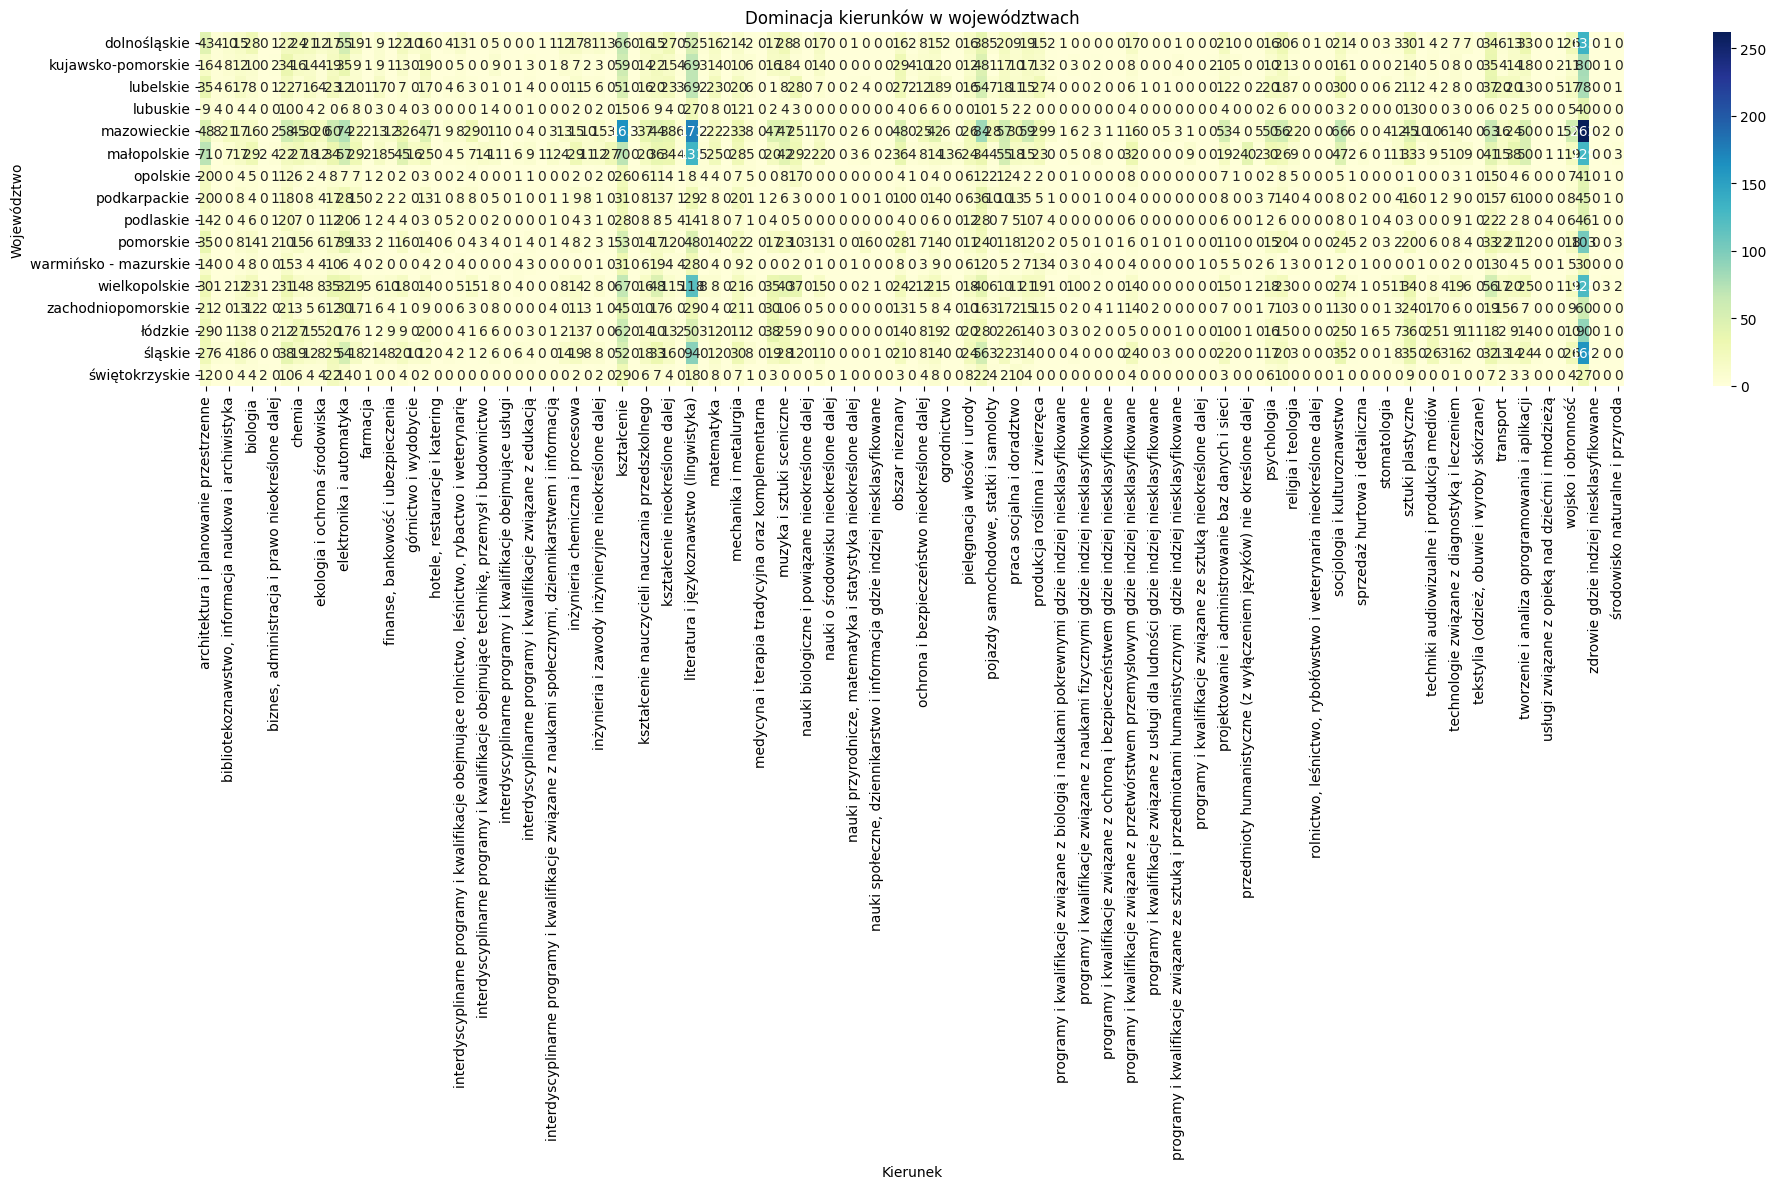

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Dominacja kierunków w województwach')
plt.xlabel('Kierunek')
plt.ylabel('Województwo')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()